In [97]:
%matplotlib inline

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MESS

from collections import OrderedDict

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Where do you want simulations to live?
analysis_dir = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/"

## Run in a shell: ipcluster start -n 40 --cluster-id=MESS --daemonize
try:
    ipyclient = ipp.Client(cluster_id="MESS")
    print(len(ipyclient))
except:
    pass

Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-MESS-client.json


## Figure 3 - Summaries of distributions through time
![Figure3 Cartoon](files/Fig3-mockup.png "MESS Figure 3 Cartoon")

## Generate simulations for figure 3
Here we fix all parameters except speciation rate and community assembly model. Generate 1000 simulations for each of the configurations (hi, lo, no speciation) and (neut, filt, comp) assembly.

In [ ]:
r = MESS.Region("figure3")
## Region params
r.set_param("project_dir", analysis_dir)
r.set_param("generations", 0)
r.set_param("mutation_rate", 2.2e-8)
r.set_param("alpha", 2000)
r.set_param("community_assembly_model", "*")

## Metacommunity Params
r.set_param("S_m", 250)
r.set_param("J_m", 750000)
r.set_param("speciation_rate", 2)
r.set_param("death_proportion", 0.7)
r.set_param("trait_rate_meta", 2)
r.set_param("ecological_strength", 1)

## Local Params
r.set_param("J", 1000)
r.set_param("m", 0.005)

for sp_prob in [0, 0.0005, 0.005]:
    r.set_param("speciation_prob", sp_prob)
    r.write_params(outfile="params-fig3-sp{}.txt".format(sp_prob), force=True)
    r.run(sims=1000, ipyclient=ipyclient)

    Generating 1000 simulation(s).
  [################### ]  99%  Performing Simulations    | 1:40:55 | 
    Cancelling remaining simulations.
  [####################] 100% 
    Finished 1000 simulations
     Generating 1000 simulation(s).


## Generate the figure

In [143]:
sim_df = pd.read_csv(analysis_dir + "SIMOUT.txt", sep="\t", header=0)

## Remove degenerate trait hill sims
sim_df = sim_df[sim_df["S"] >= sim_df["trait_h1"]]
## Drop sims that are exactly _lambda == 1
sim_df = sim_df[sim_df["_lambda"] < 1]

comp_df = sim_df[sim_df["community_assembly_model"] == "competition"]
filt_df = sim_df[sim_df["community_assembly_model"] == "filtering"]
neut_df = sim_df[sim_df["community_assembly_model"] == "neutral"]
print(len(neut_df), len(filt_df), len(comp_df))

(1324, 958, 779)


In [118]:
display(sim_df[:5])

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,250,750000,2.0,0.7,2.0,0.0001,0.0,neutral,point_mutation,0.0,2000,570.0,2000.0,0.005,0.0005,236.0,0.4810,0.00497,0.00240,0.58824,-3.50688,32.0,6.70180,3.14687,2.48240,2.25322,12.38596,10.55097,9.35867,8.58411,0.00042,0.00060,1.58456,1.89641,0.00000,0.00073,0.00670,0.00766,1.09513,-0.31859,0.00333,0.00829,0.0,12.42974,8.06052,6.86071,6.33526,-0.90107,2.74461,-0.67544,0.00945,-0.87226,3.13530,-0.82632,2.97076,-0.72604,0.06735,-0.34015,4.44986,0.07475,0.22616,-0.05059,0.05790,0.53212,1.31456,0.34283,0.44369,0.12552,0.07501,0.42609,0.04503,17.0,5.0,1.0,2.0,4.0,0.0,1.0,0.0,1.0,1.0
1,250,750000,2.0,0.7,2.0,0.0001,0.0,neutral,point_mutation,0.0,2000,570.0,2000.0,0.005,0.0050,196.0,0.5715,0.00501,0.00693,0.58824,-0.44093,56.0,11.80842,4.43940,3.22449,2.84001,19.52700,16.74855,14.72603,13.33532,0.00038,0.00059,1.79237,3.05779,0.00000,0.00067,0.00672,0.00359,1.96039,7.00222,0.00702,0.00197,0.0,20.78246,12.14396,10.07356,9.25369,3.60988,2.98914,-1.63810,2.84255,5.00094,3.45929,4.39633,2.92332,-2.08036,4.60459,5.47647,1.63726,0.78645,-0.06582,-0.44226,1.76204,0.47553,-1.82203,0.12470,0.36820,0.07906,-0.13495,-0.08931,0.07019,33.0,5.0,4.0,9.0,1.0,0.0,2.0,0.0,1.0,1.0
2,250,750000,2.0,0.7,2.0,0.0001,0.0,neutral,point_mutation,0.0,2000,570.0,2000.0,0.005,0.0005,628.0,0.8735,0.00509,0.00235,0.58824,-0.20512,33.0,15.19021,11.12496,9.54791,8.72187,12.98914,10.89025,9.52113,8.65048,0.00071,0.00101,1.70156,2.49412,0.00000,0.00097,0.01686,0.02054,1.12227,-0.42414,0.00842,0.02193,0.0,14.43583,12.06286,10.84201,10.11531,1.45311,1.95733,-0.34821,-0.32003,1.78995,1.97016,1.51349,1.86430,-0.45964,0.73432,1.74813,1.64693,0.06038,-0.09303,-0.11143,1.05435,-0.04182,-0.32322,0.49078,0.32651,-0.27427,0.05077,-0.48976,0.12991,19.0,1.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0
3,250,750000,2.0,0.7,2.0,0.0001,0.0,neutral,point_mutation,0.0,2000,570.0,2000.0,0.005,0.0005,934.0,0.9540,0.00491,0.00216,0.58824,-0.57547,35.0,15.15356,10.24333,7.97670,6.82122,14.71609,11.21178,8.93333,7.62102,0.00078,0.00113,2.58367,8.37237,0.00062,0.00094,0.01477,0.01905,1.23805,0.09904,0.00439,0.02175,0.0,11.27276,9.51031,8.56343,7.99857,-0.41312,2.76457,-0.47475,-0.34981,-0.02772,4.29392,0.02796,2.71344,-0.74194,0.64251,0.54597,3.52181,0.44108,-0.05114,-0.26719,0.99231,0.57369,-0.77211,0.68285,0.41832,0.12957,0.42142,0.16980,0.04854,17.0,10.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
4,250,750000,2.0,0.7,2.0,0.0001,0.0,neutral,point_mutation,0.0,2000,570.0,2000.0,0.005,0.0005,438.0,0.6910,0.00511,0.00216,0.58824,-8.48674,34.0,10.90428,5.80799,4.29378,3.71218,11.48559,8.70497,7.03827,6.12693,0.00039,0.00066,2.74934,8.60349,0.00000,0.00062,0.00820,0.00755,0.44657,-1.54683,0.00482,0.01596,0.0,7.80889,6.91042,6.47620,6.21843,-2.47595,4.09192,0.32380,-0.84144,-3.04213,6.49105,-0.99390,4.58651,-0.22000,-0.97664,-1.33181,8.42774,1.48206,0.49460,-0.54380,-0.13520,1.71032,1.93669,0.42299,0.28525,-0.03387,0.20573,0.09839,-0.20415,19.0,7.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [60]:

stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance_Hills"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Pi_Hills"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait_Hills"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

def plot_sumstats_through_time(sim_df, scatter=True, normalize_hills=False):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.005, 0.0005, 0])):
        x = sim_df.loc[sim_df["speciation_prob"] == spec_prob]["_lambda"]
        #import pdb; pdb.set_trace()
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats]:
                y = sim_df.loc[sim_df["speciation_prob"] == spec_prob]
                ## Plotting
                if normalize_hills and not stat == "S":
                    y = y[stat]/y["S"]
                else:
                    y = y[stat]
                z = np.poly1d(np.polyfit(x,y,4))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.2, marker='.')
                axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(sumstats)
                axs[i][j].set_ylabel(spec_label)
                axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()


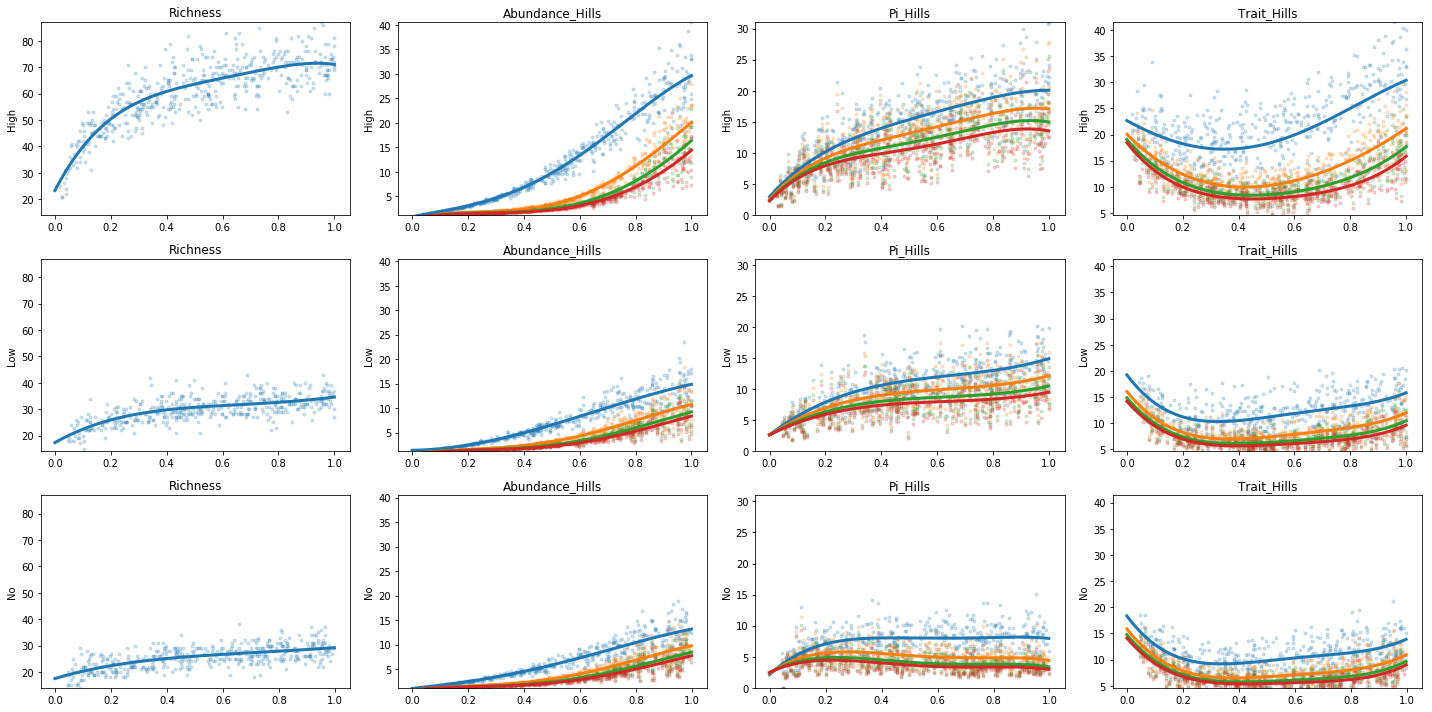

In [139]:
plot_sumstats_through_time(neut_df, scatter=True, normalize_hills=False)

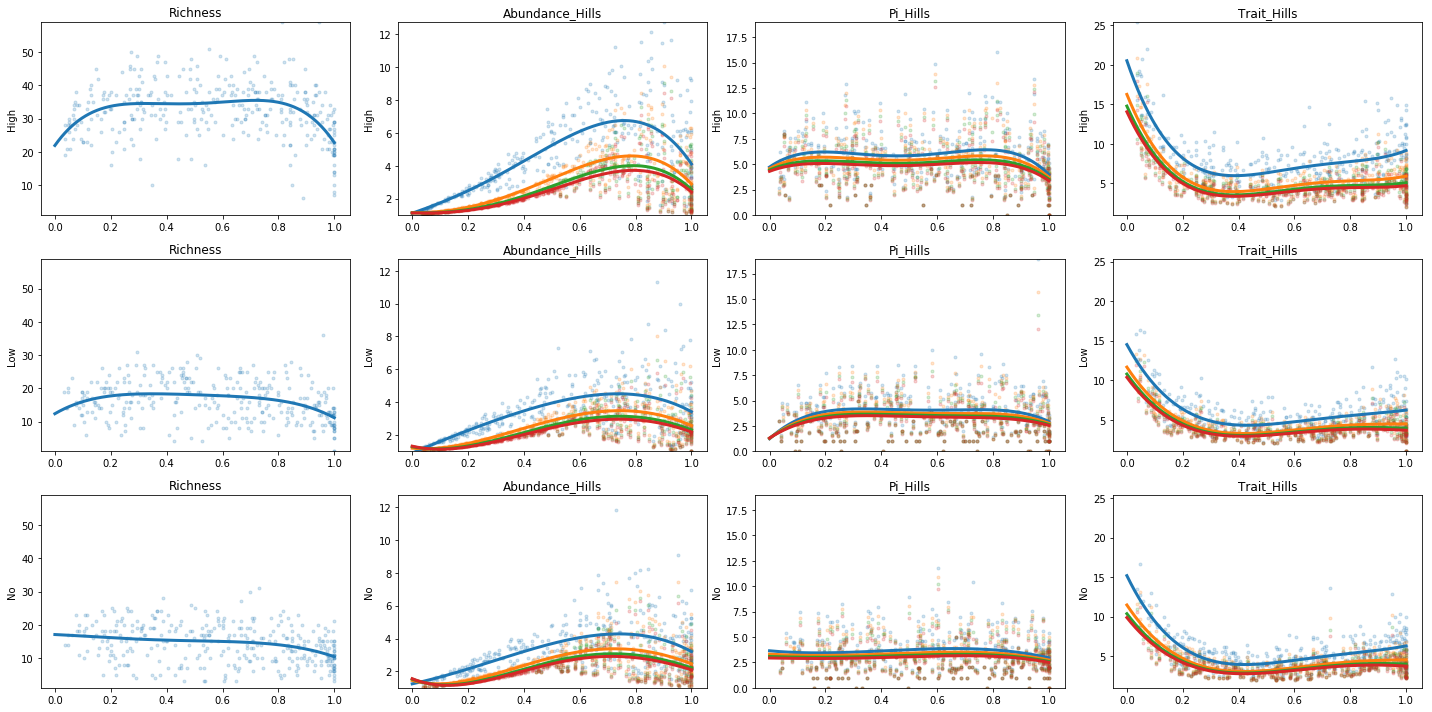

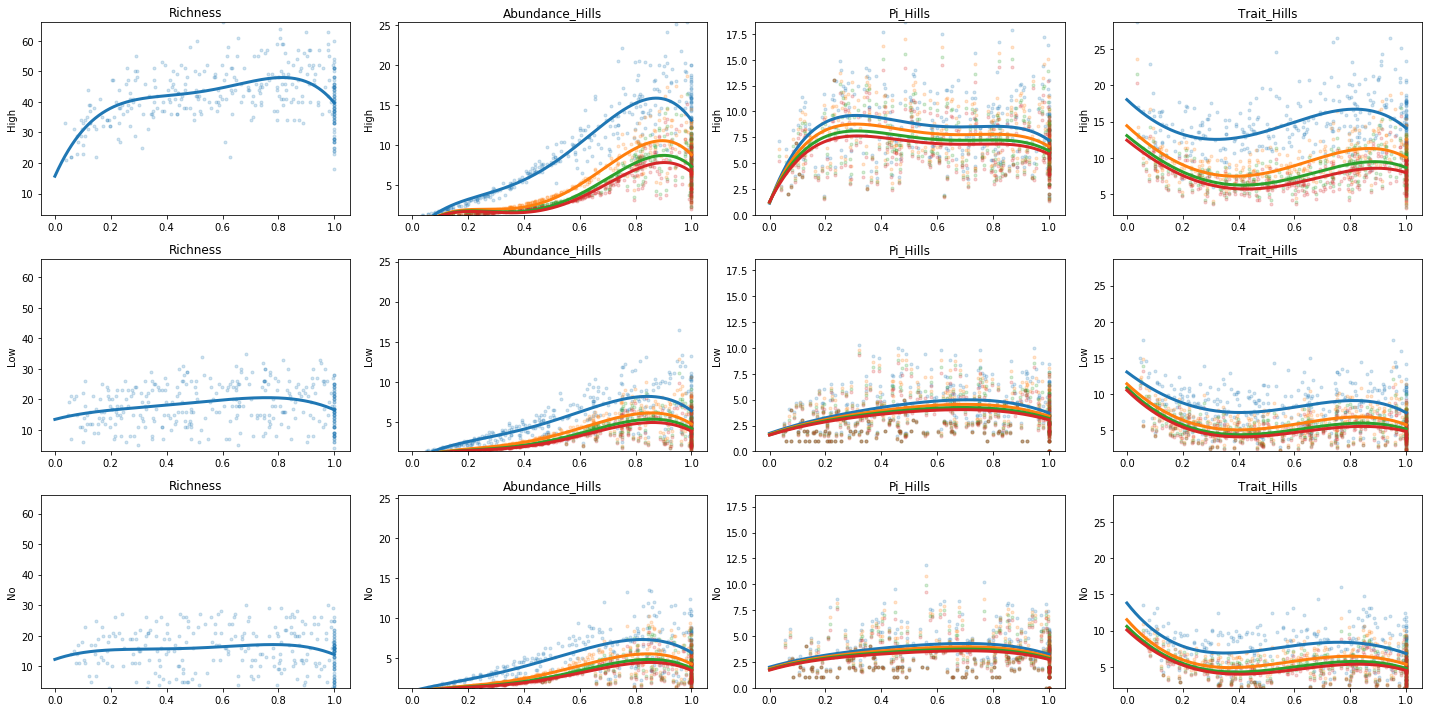

In [140]:
plot_sumstats_through_time(filt_df, scatter=True, normalize_hills=False)
plot_sumstats_through_time(comp_df, scatter=True, normalize_hills=False)

## Plot all assembly models on one figure.
Too crazy?

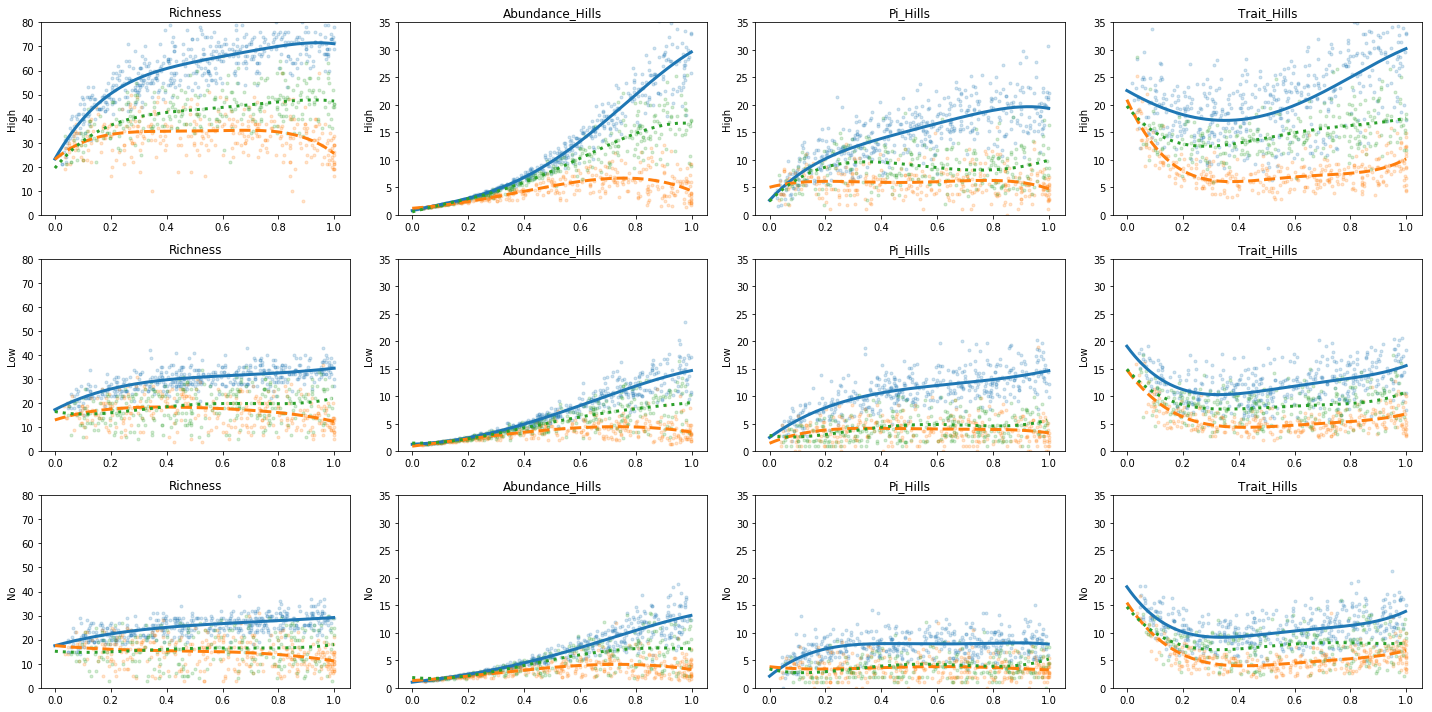

In [146]:

stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance_Hills"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Pi_Hills"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait_Hills"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

def plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=2):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}
    ## Hax
    ylims = {"Richness":(0,80), "Abundance_Hills":(0,35), "Pi_Hills":(0,35), "Trait_Hills":(0,35)}
    if normalize_hills: ylims = {"Richness":(0,85), "Abundance_Hills":(0,1), "Pi_Hills":(0,1), "Trait_Hills":(0,1)}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.005, 0.0005, 0])):
        
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats][:n_hills]:
                for model, ls in zip(["neutral", "filtering", "competition"],\
                                     ["solid", "dashed", "dotted"]):
                    x = sim_df.loc[sim_df["community_assembly_model"] == model]
                    x = x.loc[x["speciation_prob"] == spec_prob]["_lambda"]
                    y = sim_df.loc[sim_df["community_assembly_model"] == model]
                    y = y.loc[y["speciation_prob"] == spec_prob]
                    
                    ## Plotting
                    if normalize_hills and not stat == "S":
                        y = y[stat]/y["S"]
                    else:
                        y = y[stat]
                    z = np.poly1d(np.polyfit(x,y,4))
                    xs_z = np.linspace(0, max(x), 1000)
                    if scatter: axs[i][j].scatter(x, y, alpha=0.2, marker='.')
                    axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3, ls=ls)

                    ## Labeling and cleaning up the plots
                    axs[i][j].set_title(sumstats)
                    axs[i][j].set_ylabel(spec_label)
                    axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()
    plt.savefig(analysis_dir + "fig3-combined.png")
plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=1)

## Prototyping

In [72]:
[x for x in sim_df.columns if "cor" in x]

['abundance_dxy_cor',
 'abundance_pi_cor',
 'abundance_trait_cor',
 'dxy_pi_cor',
 'dxy_trait_cor',
 'pi_trait_cor']

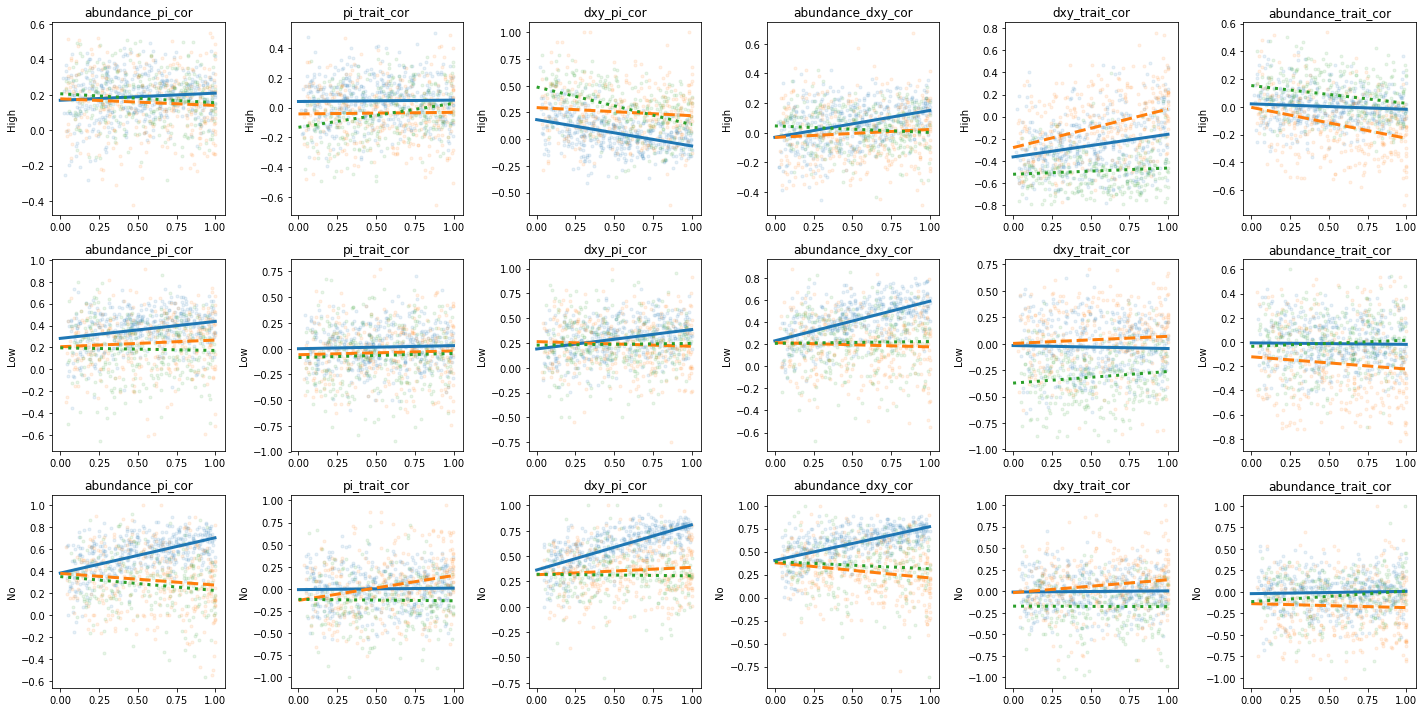

In [147]:
cors = ["abundance_pi_cor", "pi_trait_cor", "dxy_pi_cor",\
"abundance_dxy_cor", "dxy_trait_cor", "abundance_trait_cor"]

def plot_correlations_through_time(sim_df, scatter=True):
    ## Get min and max y values so the y values can be scaled identically w/in columns

    fig, axs = plt.subplots(3, 6, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.005, 0.0005, 0])):
        
        for j, cor in enumerate(cors):
            for model, ls in zip(["neutral", "filtering", "competition"],\
                                 ["solid", "dashed", "dotted"]):
                x = sim_df.loc[sim_df["community_assembly_model"] == model]
                x = x.loc[x["speciation_prob"] == spec_prob]["_lambda"]
                y = sim_df.loc[sim_df["community_assembly_model"] == model]
                y = y.loc[y["speciation_prob"] == spec_prob][cor]

                z = np.poly1d(np.polyfit(x,y,1))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.1, marker='.')
                axs[i][j].plot(xs_z, z(xs_z), label=model, lw=3, ls=ls)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(cor)
                axs[i][j].set_ylabel(spec_label)
    plt.tight_layout()
plot_correlations_through_time(sim_df, scatter=True)

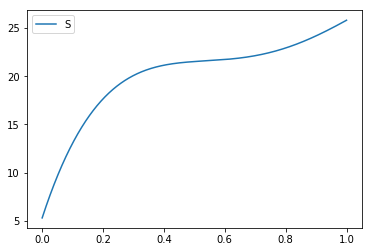

In [44]:
stat = "S"
x = sim_df["_lambda"]
y = sim_df[stat]
z = np.poly1d(np.polyfit(x,y,4))
xs_z = np.linspace(0, 1, 1000)
#plt.scatter(sim_df["_lambda"], sim_df["S"])
plt.plot(xs_z, z(xs_z), label=stat)
plt.legend()

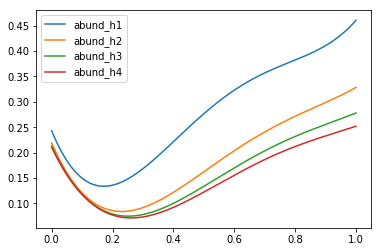

In [49]:
#for stat in ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]:
for stat in ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]:
#for stat in ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]:
    x = sim_df["_lambda"]
    y = sim_df[stat]/sim_df["S"]
    z = np.poly1d(np.polyfit(x,y,4))
    xs_z = np.linspace(0, 1, 1000)
    #plt.scatter(sim_df["_lambda"], sim_df["S"])
    plt.plot(xs_z, z(xs_z), label=stat)
    plt.legend()

273
22


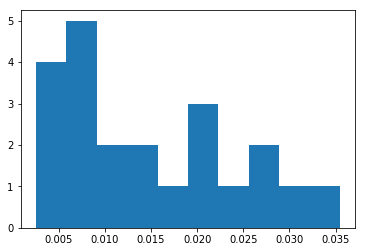

In [114]:
print(len(sim_df[["S", "trait_h1"]]))
plt.hist(sim_df[sim_df["S"] < sim_df["trait_h1"]]["_lambda"])
print(np.sum(sim_df["S"] < sim_df["trait_h1"]))

In [ ]:
plot_sumstats_through_time(neut_df, scatter=True, normalize_hills=False)